In [2]:
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools

In [146]:
# # load csv files into dataframes
# # the paramaters low_memory=False, dtype=str tell pandas not to guess the datatype
# # and make everything a string
# # note: many posts say low_memory=False doesn't do anything ... 
# df_patients = pds.read_csv('patients.csv', low_memory=False, dtype=str, encoding='utf-8')
# df_patients_teeth = pds.read_csv('patient_teeth.csv', low_memory=False, dtype=str, encoding='utf-8')
# df_tooth_caries = pds.read_csv('tooth_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
# df_tooth_surface_caries = pds.read_csv('tooth_surface_caries.csv', low_memory=False, dtype=str, encoding='utf-8')
# df_tooth_procedures = pds.read_csv('tooth_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')
# df_tooth_surface_procedures = pds.read_csv('tooth_surface_procedures_no_es.csv', low_memory=False, dtype=str, encoding='utf-8')

In [147]:
# # drop duplicates from dataframes
# df_patients.drop_duplicates(inplace=True)
# df_patients_teeth.drop_duplicates(inplace=True)
# df_tooth_caries.drop_duplicates(inplace=True)
# df_tooth_surface_caries.drop_duplicates(inplace=True)
# df_tooth_procedures.drop_duplicates(inplace=True)
# df_tooth_surface_procedures.drop_duplicates(inplace=True)

In [7]:
# len(df_patients) # 229,414

In [148]:
# # merge, patients, teeth data frames
# df_teeth = pds.merge(df_patients, df_patients_teeth, how='inner', on=['patient_id'])
# df_teeth.drop_duplicates(inplace=True)
# # df_teeth.head()

In [149]:
# # merge teeth and procedures data frames
# temp = df_tooth_procedures[df_tooth_procedures.tooth_id.isin(df_teeth.tooth_id)]
# df_procedures = pds.merge(df_teeth, temp, how='left', on=['tooth_id', 'tooth_num'])
# # len(df_procedures) 
# # df_procedures.head()

In [151]:
# # merge procedures with surface information
# # this final dataset will be the 'observations' dataset
# temp = df_tooth_surface_procedures[df_tooth_surface_procedures.event_id.isin(df_procedures.event_id)]
# df_obs = pds.merge(df_procedures, temp, how='left', on=['event_id', 'tooth_id', 'tooth_num'])
# df_obs.tooth_num = df_obs.tooth_num.astype(int)
# # len(df_obs)

In [154]:
# # convert columns to datetime datatype (in case they aren't stored as datetimes)
# df_obs.dob = pds.to_datetime(df_obs.dob)
# df_obs.first_visit = pds.to_datetime(df_obs.first_visit, errors = 'coerce')
# df_obs.last_visit = pds.to_datetime(df_obs.last_visit, errors = 'coerce')
# df_obs.first_PCR = pds.to_datetime(df_obs.first_PCR, errors = 'coerce')
# df_obs.first_RCT = pds.to_datetime(df_obs.first_RCT, errors = 'coerce')
# df_obs.event_date = pds.to_datetime(df_obs.event_date, errors = 'coerce')
# df_obs.extract_date = pds.to_datetime(df_obs.extract_date, errors = 'coerce')
# df_obs.missing_date = pds.to_datetime(df_obs.missing_date, errors = 'coerce')


In [153]:
# # load tooth meta info from file (i.e., info about which teeth are upper, lower, right, left, etc.)
# tooth_info = pds.read_csv("tooth_meta_info.csv", index_col='tooth')
# # tooth_info

In [156]:
# merge tooth meta data with tooth observations
# df_obs = pds.merge(df_obs, tooth_info, left_on='tooth_num', right_on='tooth', how='left')

In [157]:
# add patient ages to observations (using year 2017)
# df_obs['patient_age'] = 2017 - pds.to_datetime(df_obs.dob).dt.year


In [158]:
# some of the patient ages are less than zero due to bad DOB data
# let's drop the records
# df_obs = pds.DataFrame(df_obs.query('patient_age > 0'))

In [175]:
# save observations data frame
# df_obs.to_csv("observations.csv", index=False)
# df_obs.head()

In [292]:
# read obseravtion data from file
df_obs = pds.read_csv('observations.csv', low_memory=False, dtype=str, encoding='utf-8')

In [293]:
# set surface flags to numeric
df_obs.m = pds.to_numeric(df_obs.m)
df_obs.o = pds.to_numeric(df_obs.o)
df_obs.d = pds.to_numeric(df_obs.d)
df_obs.b = pds.to_numeric(df_obs.b)
df_obs.l = pds.to_numeric(df_obs.l)
df_obs.f = pds.to_numeric(df_obs.f)
df_obs.i = pds.to_numeric(df_obs.i)

In [294]:
# convert columns to datetime datatype (in case they aren't stored as datetimes)
df_obs.dob = pds.to_datetime(df_obs.dob)
df_obs.first_visit = pds.to_datetime(df_obs.first_visit, errors = 'coerce')
df_obs.last_visit = pds.to_datetime(df_obs.last_visit, errors = 'coerce')
df_obs.first_PCR = pds.to_datetime(df_obs.first_PCR, errors = 'coerce')
df_obs.first_RCT = pds.to_datetime(df_obs.first_RCT, errors = 'coerce')
df_obs.event_date = pds.to_datetime(df_obs.event_date, errors = 'coerce')
df_obs.extract_date = pds.to_datetime(df_obs.extract_date, errors = 'coerce')
df_obs.missing_date = pds.to_datetime(df_obs.missing_date, errors = 'coerce')


In [295]:
# build dataframe of restorations on surfaces
df_fillings = df_obs[['tooth_id', 'tooth_num', 'ada_code', 'event_name', 'm','o', 'd', 'b', 'l', 'f', 'i']]

In [296]:
df_fillings.head()

,tooth_id,tooth_num,ada_code,event_name,m,o,d,b,l,f,i
0,A_1_1_155_19,19,D2750,porcelain fused to high noble metal crown rest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_1_1_155_19,19,D2750,porcelain fused to high noble metal crown rest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A_1_1_155_18,18,D2750,porcelain fused to high noble metal crown rest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A_1_1_155_18,18,D2750,porcelain fused to high noble metal crown rest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A_1_1_155_10,10,D2750,porcelain fused to high noble metal crown rest...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
df_obs.columns

Index(['practice', 'patient_id', 'gender', 'dob', 'first_visit', 'last_visit',
       'tooth_id', 'tooth_num', 'first_PCR', 'first_RCT', 'extract_date',
       'missing_date', 'event_id', 'event_name', 'event_date', 'ada_code', 'm',
       'o', 'd', 'b', 'l', 'f', 'i', 'tooth_label', 'molar', 'premolar',
       'canine', 'incisor', 'upper', 'lower', 'right', 'right upper',
       'right lower', 'left', 'left upper', 'left lower', 'posterior',
       'anterior', 'right upper molar', 'left upper molar',
       'right lower molar', 'left lower molar', 'right upper premolar',
       'left upper premolar', 'right lower premolar', 'left lower premolar',
       'right upper canine', 'left upper canine', 'right lower canine',
       'left lower canine', 'right upper incisor', 'left upper incisor',
       'right lower incisor', 'left lower incisor', 'patient_age'],
      dtype='object')

In [298]:
data = {
    'right upper posterior': [len(df_obs[(df_obs['right upper'] == '1') & (df_obs.posterior == '1')])],
    'right upper anterior': [len(df_obs[(df_obs['right upper'] == '1') & (df_obs.anterior == '1')])],
    'left upper anterior': [len(df_obs[(df_obs['left upper'] == '1') & (df_obs.anterior == '1')])],
    'left upper posterior': [len(df_obs[(df_obs['left upper'] == '1') & (df_obs.posterior == '1')])],
    'left lower posterior': [len(df_obs[(df_obs['left lower'] == '1') & (df_obs.posterior == '1')])],
    'left lower anterior': [len(df_obs[(df_obs['left lower'] == '1') & (df_obs.anterior == '1')])],
    'right lower anterior': [len(df_obs[(df_obs['right lower'] == '1') & (df_obs.anterior == '1')])],
    'right lower posterior': [len(df_obs[(df_obs['right lower'] == '1') & (df_obs.posterior == '1')])]
}
data = \
    [len(df_obs[(df_obs['right upper'] == '1') & (df_obs.posterior == '1')]),
     len(df_obs[(df_obs['right upper'] == '1') & (df_obs.anterior == '1')]),
     len(df_obs[(df_obs['left upper'] == '1') & (df_obs.anterior == '1')]),
     len(df_obs[(df_obs['left upper'] == '1') & (df_obs.posterior == '1')]),
     len(df_obs[(df_obs['left lower'] == '1') & (df_obs.posterior == '1')]),
     len(df_obs[(df_obs['left lower'] == '1') & (df_obs.anterior == '1')]),
     len(df_obs[(df_obs['right lower'] == '1') & (df_obs.anterior == '1')]),
     len(df_obs[(df_obs['right lower'] == '1') & (df_obs.posterior == '1')])]

temp = pds.DataFrame(data, 
                     index=['right upper posterior', 'right upper anterior', 
                            'left upper anterior', 'left upper posterior', 
                            'left lower posterior', 'left lower anterior', 
                            'right lower anterior', 'right lower posterior'])
# temp.head()

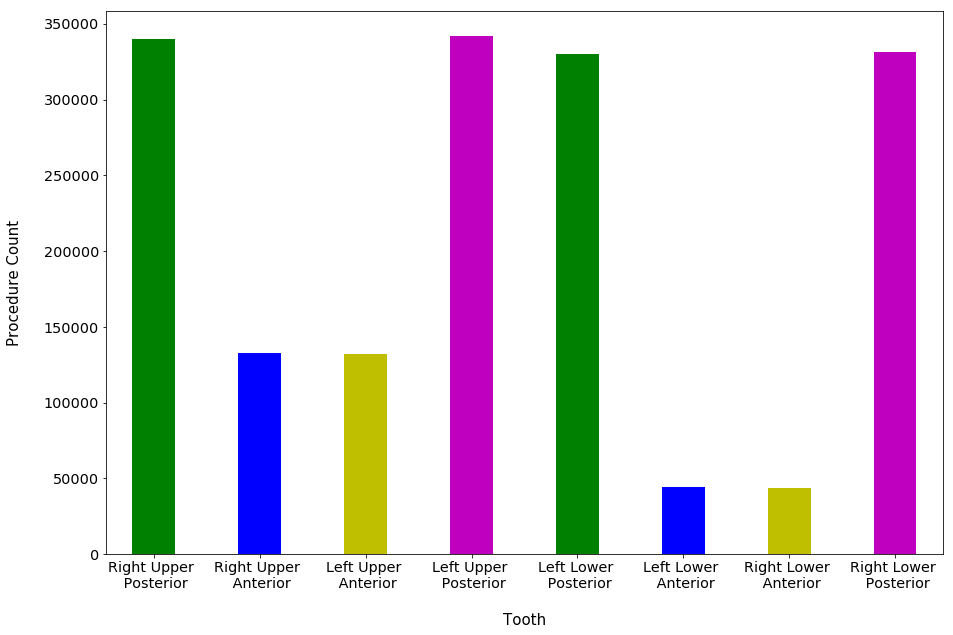

In [299]:
%matplotlib inline

# draw bar chart showing the number of procedures performed on each tooth (number)
ax = temp.plot.bar(figsize=(15,10), width=0.4, legend=False, color = ['gbym']) 
# ax = temp.plot.bar(figsize=(2,10), width=0.4, legend=False) 

# rotate the ticks on the x axis
plt.xticks(rotation=0)

# configure labels
# note the use of '\n' to create space between ticks and labels
ax.set_xlabel("\nTooth", fontsize=15)
ax.set_ylabel("Procedure Count\n", fontsize=15)

xlabels = ['Right Upper \n Posterior', 'Right Upper \n Anterior', 
            'Left Upper \n Anterior', 'Left Upper \n Posterior', 
            'Left Lower \n Posterior', 'Left Lower \n Anterior', 
            'Right Lower \n Anterior', 'Right Lower \n Posterior']
ax.set_xticklabels(xlabels)
ax.tick_params(labelsize='x-large')

plt.show()

In [300]:
genders = df_obs.gender.value_counts()
genders

female    937968
male      758552
Name: gender, dtype: int64

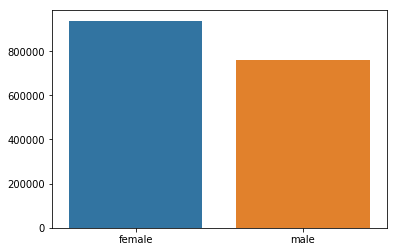

In [302]:
%matplotlib inline
ax = sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [325]:
ages = df_obs[['gender', 'patient_age']]
counts = ages.patient_age.value_counts()

In [331]:
# ages.index
females = ages[ages.gender == 'female'].patient_age.value_counts()
# females

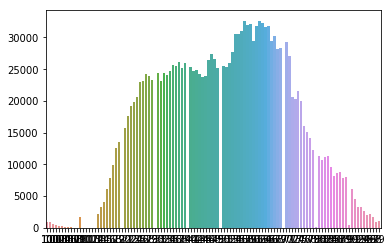

In [329]:
%matplotlib inline
ax = sns.barplot(x=counts.index, y=counts.values)
plt.show()